<h1><center>LOG6953C - TP3</center></h1>

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
from qiskit.tools.monitor import job_monitor
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

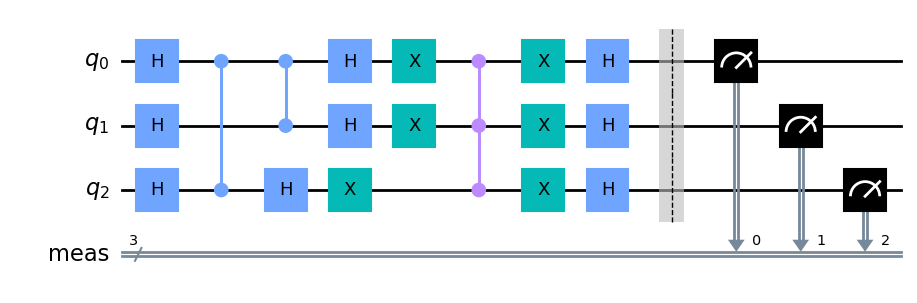

In [160]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2,1,0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

In [161]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-24 11:27:06,842: Credentials are already in use. The existing account in the session will be replaced.


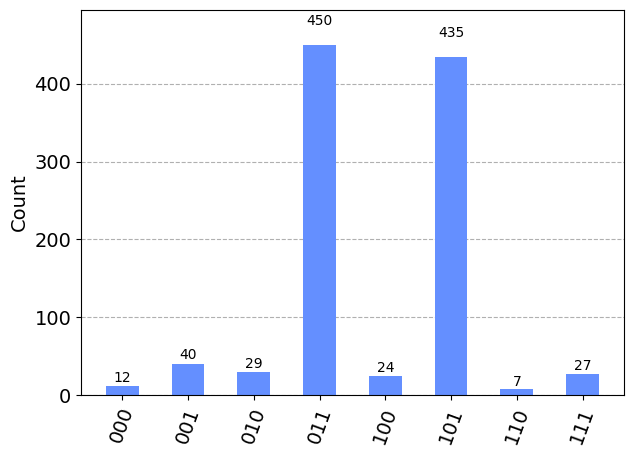

In [162]:
# Run 3 qubit Grover on Fake Nairobi noisy simulator
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)
# Get the results from the computation,
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Question 2

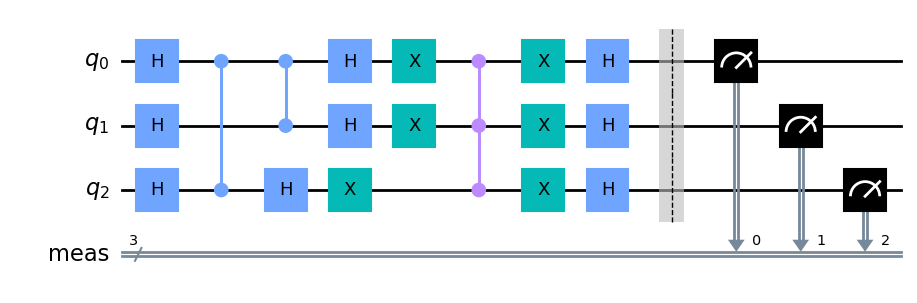

In [163]:
set_of_circuits = dict()

circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)

prog.measure_all()
'''

set_of_circuits["circuit"]=[circuit]

exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

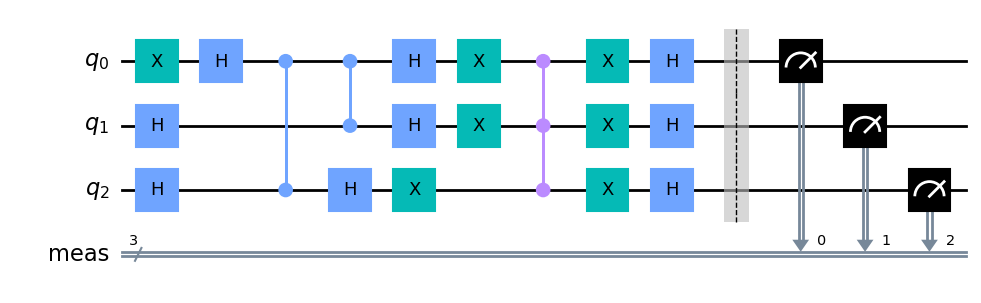

In [164]:
# inversion de qubit 
mutant_1 = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_1"]=[mutant_1]

exec(mutant_1)
prog.draw(output='mpl')

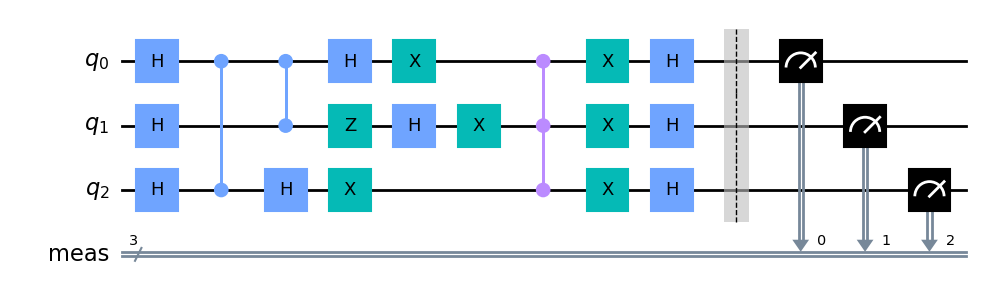

In [165]:
# insertion de porte
mutant_2 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.z(1)
for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_2"]=[mutant_2]

exec(mutant_2)
prog.draw(output='mpl')

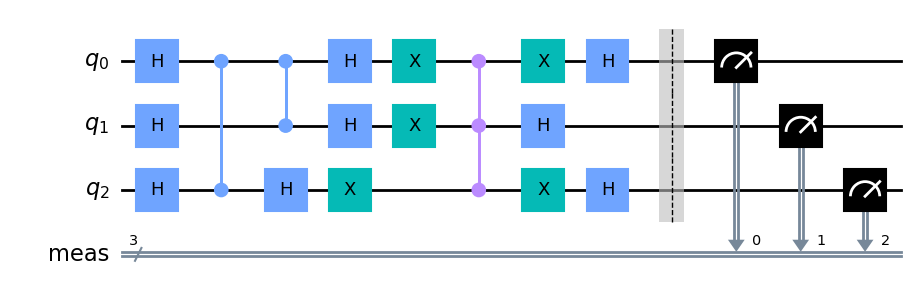

In [166]:
# suppression de porte
mutant_3 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(2)
    
prog.h(0)
prog.h(1)
prog.h(2)
    
prog.measure_all()
'''

set_of_circuits["mutant_3"]=[mutant_3]

exec(mutant_3)
prog.draw(output='mpl')

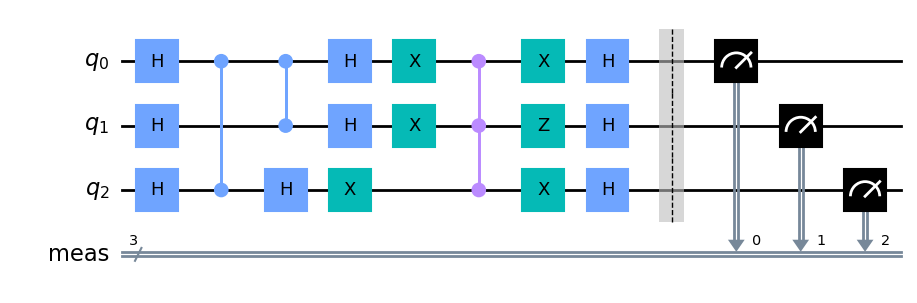

In [167]:
# changement de porte
mutant_4 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.z(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_4"]=[mutant_4]

exec(mutant_4)
prog.draw(output='mpl')

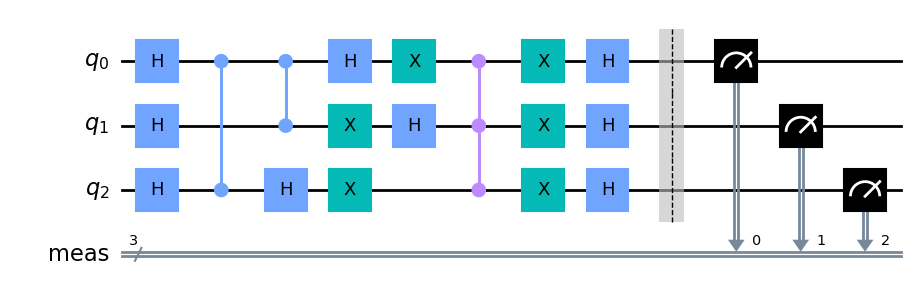

In [168]:
# échange de porte
mutant_5 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.h(0)
prog.x(1)
prog.h(2)

prog.x(0)
prog.h(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_5"]=[mutant_5]

exec(mutant_5)
prog.draw(output='mpl')

In [169]:
print(list(set_of_circuits.keys()))

['circuit', 'mutant_1', 'mutant_2', 'mutant_3', 'mutant_4', 'mutant_5']


variants

In [170]:
def cz_to_hcnoth(codeline:str,number:int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline)+"# number="+str(number)+"\n"+\
               re.sub('cz', "cx", new_codeline)+"# number="+str(number+1)+"\n"+\
               re.sub('cz[(](.*)[,]',"h(", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

In [171]:
def x_to_cnotxcnot(codeline:str,number:int):
    help_qubit_now = re.compile("prog.x[(]")
    help_qubit = int(codeline[help_qubit_now.search(codeline).span()[1]]) #can not handle 10+ qubits
    if help_qubit==0:
        help_qubit = 1
    else:
        help_qubit = 0
    if re.search('prog.x', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('x[(]', "cx("+str(help_qubit)+",", new_codeline)+"# number="+str(number)+"\n"+\
               new_codeline+"# number="+str(number+1)+"\n"+\
               re.sub(r'x[(]', "cx("+str(help_qubit)+",", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No X gate for X transformation')

In [172]:
def x_to_hssh(codeline:str,number:int):
    if re.search('prog.x',codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        codeline = re.sub(r'x',"h",new_codeline)+"# number="+str(number)+"\n"+\
                   re.sub(r'x',"s",new_codeline)+"# number="+str(number+1)+"\n"+ \
                   re.sub(r'x', "s", new_codeline)+"# number="+str(number+2)+"\n" + \
                   re.sub(r'x', "h", new_codeline) + "# number=" + str(number + 3) + "\n"
        return codeline
    else:
        raise Exception('No X gate for HSSH transformation')

In [173]:
# Premier variant : cz_to_hcnoth
# Second variant : x_to_cnotxcnot
# Troisieme variant : x_to_hssh
# Quatrieme variant : switch prog.cz(2, 0) et prog.cz(1, 0)
# Cinquieme varaint : ajouter double x

In [174]:
def create_first_three_variants(code_circuit, function, search_sequence):
    lines = code_circuit.splitlines()
    mutant = ""
    for i, line in enumerate(lines):
        if search_sequence in line:
            mutant+='\n'+function(line,i)
        else :
            mutant+='\n'+line
    return mutant

def create_variant_1(code_circuit):
    return create_first_three_variants(code_circuit, cz_to_hcnoth, 'prog.cz')

def create_variant_2(code_circuit):
    return create_first_three_variants(code_circuit, x_to_cnotxcnot, 'prog.x')

def create_variant_3(code_circuit):
    return create_first_three_variants(code_circuit, x_to_hssh, 'prog.x')

def create_variant_4(code_circuit):
    inter = re.sub('prog.cz\(2, 0\)', "first_gate", re.sub('prog.cz\(1, 0\)', "second_gate", code_circuit))
    mutant = re.sub('second_gate', 'prog.cz(2, 0)', re.sub("first_gate", 'prog.cz(1, 0)', inter))
    return mutant

def create_variant_5(code_circuit):
    mutant = re.sub('prog.cz\(2, 0\)', "prog.cz(2, 0)\nprog.x(1)\nprog.x(1)",  code_circuit)
    return mutant

In [175]:
for mutant in list(set_of_circuits.keys()):
    set_of_circuits[mutant].append(create_variant_1(set_of_circuits[mutant][0]))
    set_of_circuits[mutant].append(create_variant_2(set_of_circuits[mutant][0]))
    set_of_circuits[mutant].append(create_variant_3(set_of_circuits[mutant][0]))
    set_of_circuits[mutant].append(create_variant_4(set_of_circuits[mutant][0]))
    set_of_circuits[mutant].append(create_variant_5(set_of_circuits[mutant][0]))

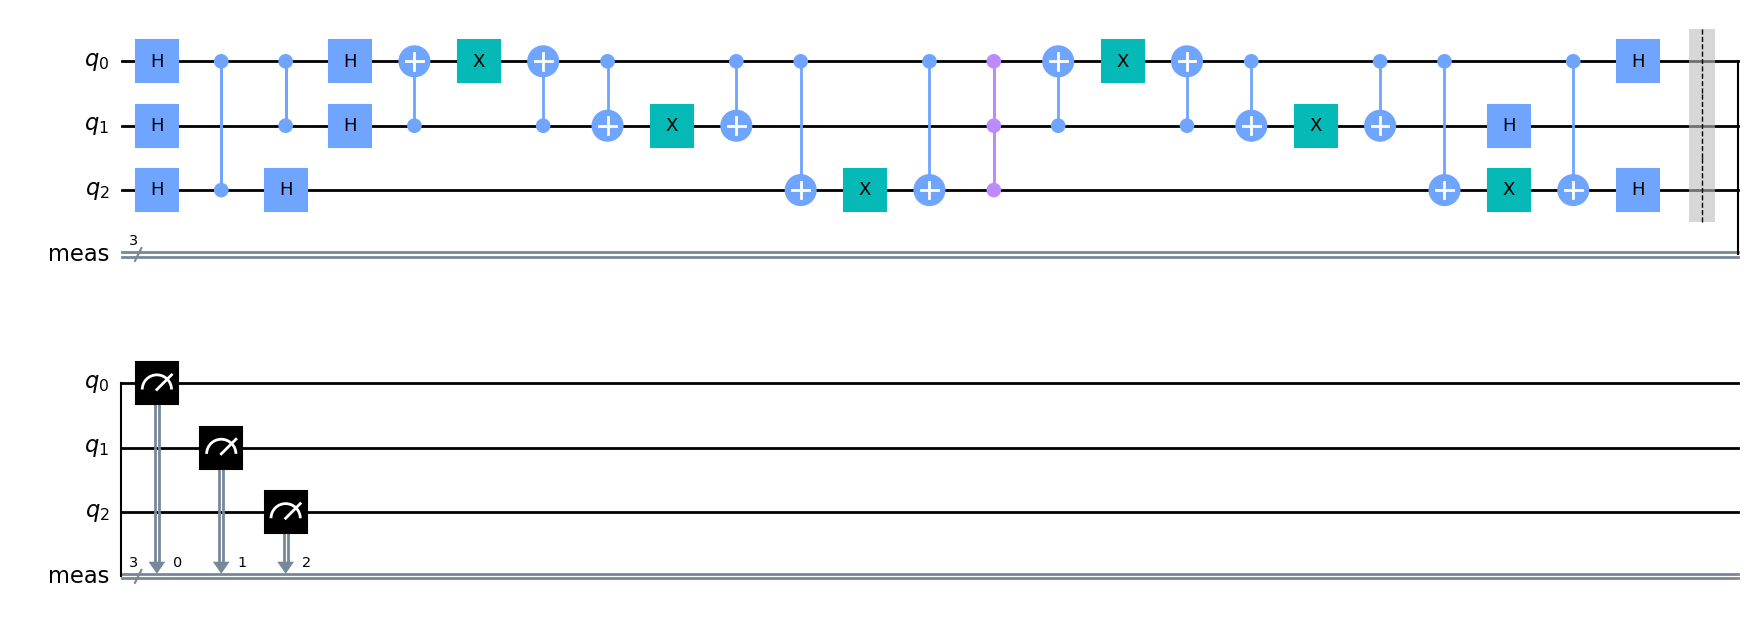

In [176]:
exec(create_variant_2(circuit))
prog.draw(output='mpl')

Question 3

In [177]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
print("Compare chaque set de circuit équivalent avec sa version de référence.")
for mutant in list(set_of_circuits.keys()):
    print(mutant)
# for mutant in ["circuit"]:
    circuit_ref = set_of_circuits[mutant][0]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=1024)
    answer_ref = job_ref.result().get_counts()
    rvs = np.array([answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))])

    for circuit in set_of_circuits[mutant][1:]:
        exec(circuit)
        
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=1024)
        answer = job.result().get_counts()
        cdf = np.array([answer[qubit] for qubit in sorted(list(answer.keys()))])

        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        print(stats.kstest(rvs, cdf, alternative= "two-sided"))

Compare chaque set de circuit équivalent avec sa version de référence.
circuit
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=25, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=25, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=25, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=25, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=6, statistic_sign=1)
mutant_1
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=27, statistic_sign=-1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=10, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=35, statistic_sign=-1)
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=8, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic

In [178]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)

print("On compare chaque variant avec la version non mutée du même variant.")
for i in range(len(set_of_circuits['circuit'])):
    print(i)
# for mutant in ["circuit"]:
    circuit_ref = set_of_circuits['circuit'][i]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=10000)
    answer_ref = job_ref.result().get_counts()
    rvs = np.array([answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))])

    for circuit in [x for x in list(set_of_circuits.keys()) if x != "circuit"]:
        exec(circuit)
        
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=10000)
        answer = job.result().get_counts()
        cdf = np.array([answer[qubit] for qubit in sorted(list(answer.keys()))])

        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        print(stats.kstest(rvs, cdf, alternative= "two-sided"))


On compare chaque variant avec la version non mutée du même variant.
On devrait obtenir des résultats éloignés, donc une faible p-value
0
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=241, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=241, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=241, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=241, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=67, statistic_sign=1)
1
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=251, statistic_sign=1)
KstestResult(statistic=0.25, pvalue=0.98010878010878, statistic_location=93, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=251, statistic_sign=1)
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=

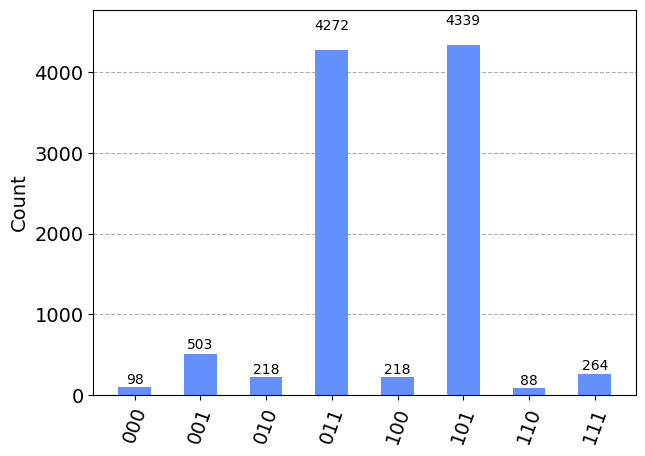

In [179]:
plot_histogram(answer)

[ 17  49  17 459  24 425   4  29]


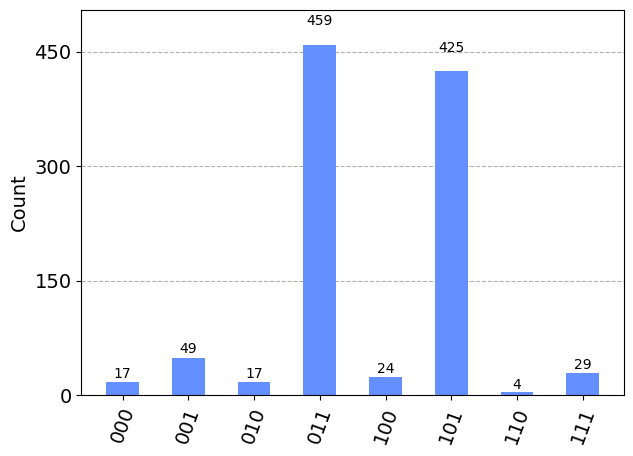

In [180]:
circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)

prog.measure_all()
'''

exec(circuit)


transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=1024)
answer_ref = job_ref.result().get_counts()
rvs = np.array([answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))])
print(rvs)
plot_histogram(answer_ref)


In [181]:
# suppression de porte
mutant_1 = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

exec(set_of_circuits['circuit'][2])


transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
job = execute(prog, sim_nairo, shots=1024)
answer = job.result().get_counts()
cdf = np.array([answer[qubit] for qubit in sorted(list(answer.keys()))])
print(cdf)
# plot_histogram(answer)
print(stats.kstest(rvs, cdf, alternative= "two-sided"))

[ 23  73  26 418  30 388  20  46]
KstestResult(statistic=0.375, pvalue=0.6601398601398599, statistic_location=17, statistic_sign=1)
